In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("../outputs/cleaned_india_housing_prices.csv")

In [53]:
df .head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Amenities,Facing,Owner_Type,Availability_Status,is_ready_to_move,has_parking,Price_per_SqFt_capped,Size_in_SqFt_capped,City_median_price,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.49,1990,...,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,1,0,10332.49,4740,256.915,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.73,2008,...,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,0,0,8270.73,2364,258.930,0
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.40,1997,...,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,1,1,5046.40,3642,249.420,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.49,1991,...,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,1,1,10955.49,2741,252.480,0
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.25,2002,...,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,1,0,3792.25,4823,251.630,1


## Q1: Distribution of property prices

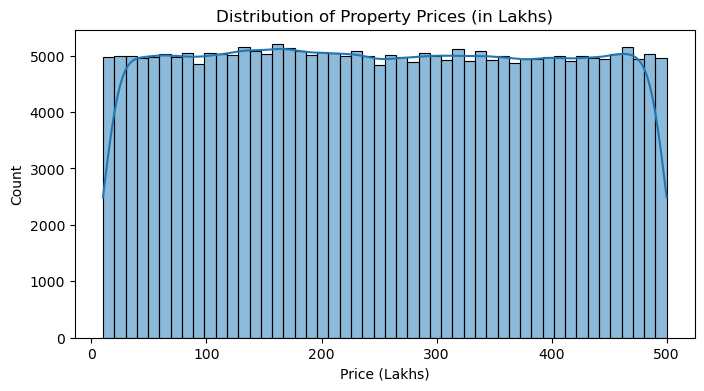

In [54]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price_in_Lakhs'], bins=50, kde=True)
plt.title("Distribution of Property Prices (in Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.savefig("../outputs/figures/price_distribution.png", bbox_inches='tight')
plt.show()

## Q2: Distribution of property sizes

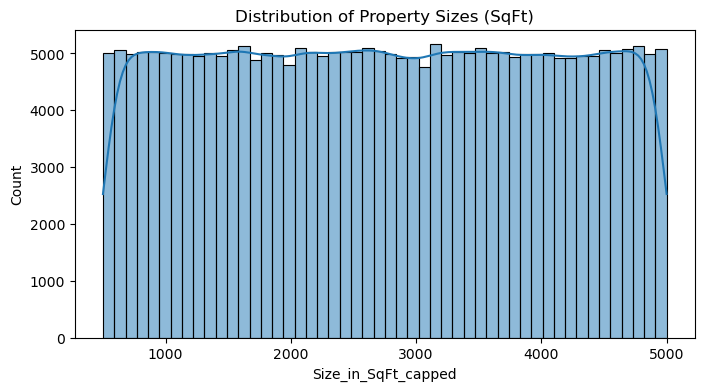

In [55]:
plt.figure(figsize=(8,4))
sns.histplot(df['Size_in_SqFt_capped'], bins=50, kde=True)
plt.title("Distribution of Property Sizes (SqFt)")
plt.savefig("../outputs/figures/size_distribution.png", bbox_inches='tight')
plt.show()

## Q3: Price per sqft by property type

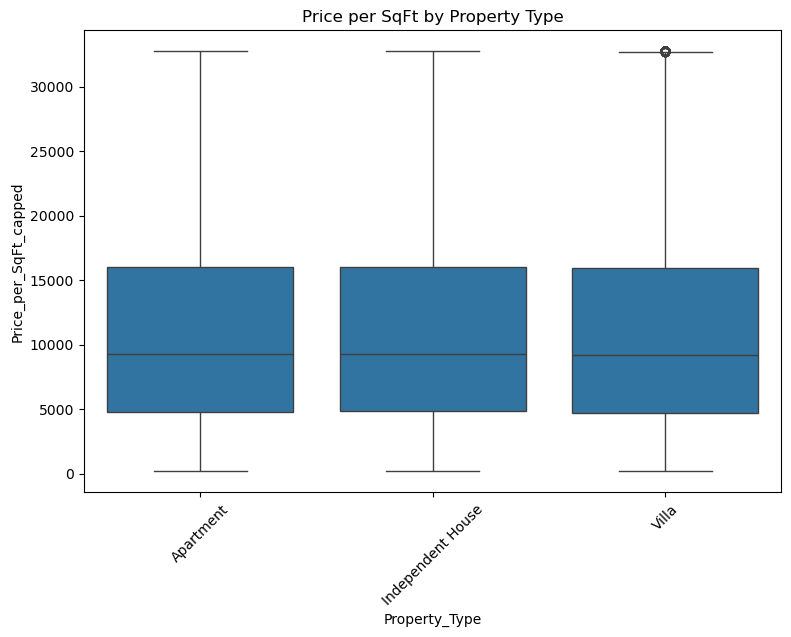

In [56]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Property_Type', y='Price_per_SqFt_capped', data=df)
plt.xticks(rotation=45)
plt.title("Price per SqFt by Property Type")
plt.savefig("../outputs/figures/price_per_sqft_by_type.png", bbox_inches='tight')
plt.show()

## Q4: Relationship between size and price

C:\Users\banik\AppData\Local\Temp\ipykernel_30340\2929745206.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("../outputs/figures/price_vs_size.png", bbox_inches='tight')
C:\Users\banik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


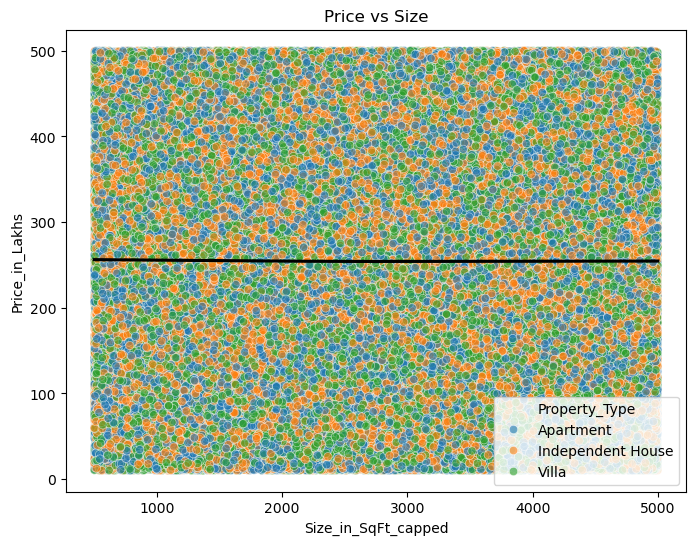

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Size_in_SqFt_capped', y='Price_in_Lakhs', hue='Property_Type', data=df, alpha=0.6)
sns.regplot(x='Size_in_SqFt_capped', y='Price_in_Lakhs', data=df, scatter=False, lowess=True, color='black')
plt.title("Price vs Size")
plt.savefig("../outputs/figures/price_vs_size.png", bbox_inches='tight')
plt.show()

## 5. Outliers detection (top 10 by price per sqft)

In [58]:
df.sort_values('Price_per_SqFt_capped', ascending=False).head(10)[['ID','City','Locality','Price_per_SqFt','Price_in_Lakhs','Size_in_SqFt']]

,ID,City,Locality,Price_per_SqFt,Price_in_Lakhs,Size_in_SqFt
169798,169799,Ahmedabad,Locality_235,35096.97,474.16,1351
24620,24621,Indore,Locality_325,64641.20,389.14,602
215176,215177,Noida,Locality_204,37637.57,198.35,527
124883,124884,Ludhiana,Locality_388,78907.27,433.99,550
74260,74261,Faridabad,Locality_472,33422.83,357.29,1069
154840,154841,Noida,Locality_452,33361.73,462.06,1385
238390,238391,Chennai,Locality_35,43684.06,460.43,1054
154843,154844,Dwarka,Locality_245,36238.53,395.00,1090
238395,238396,Haridwar,Locality_368,49455.32,348.66,705
238399,238400,Vishakhapatnam,Locality_339,41697.79,415.31,996


# 2. Location-based analysis 

## 2.1 Avg Property price per sqft by City

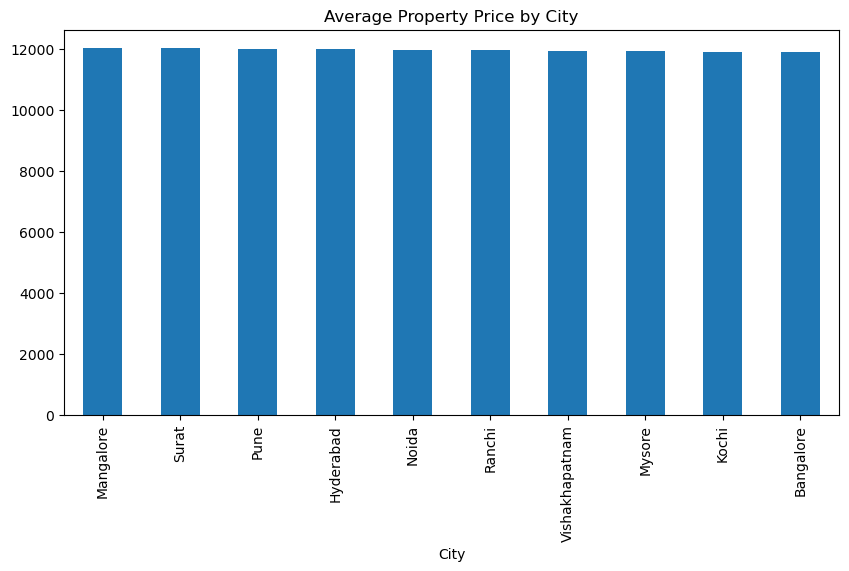

In [59]:
city_avg = df.groupby('City')['Price_per_SqFt_capped'].mean().sort_values(ascending=False)
city_avg.head(10).plot(kind='bar', figsize=(10,5), title='Average Property Price by City')
plt.savefig("../outputs/figures/avg_price_by_city.png", bbox_inches='tight')
plt.show()

## 2.2.Median age by locality 

In [60]:
locality_age = df.groupby('Locality')['Age_of_Property'].median().sort_values()
locality_age.head(10)

Locality
Locality_443    16.0
Locality_468    17.0
Locality_312    17.0
Locality_46     17.0
Locality_13     17.0
Locality_458    17.0
Locality_92     17.0
Locality_454    17.0
Locality_290    17.0
Locality_450    17.0
Name: Age_of_Property, dtype: float64

## 2.3 BHK distributed across cities

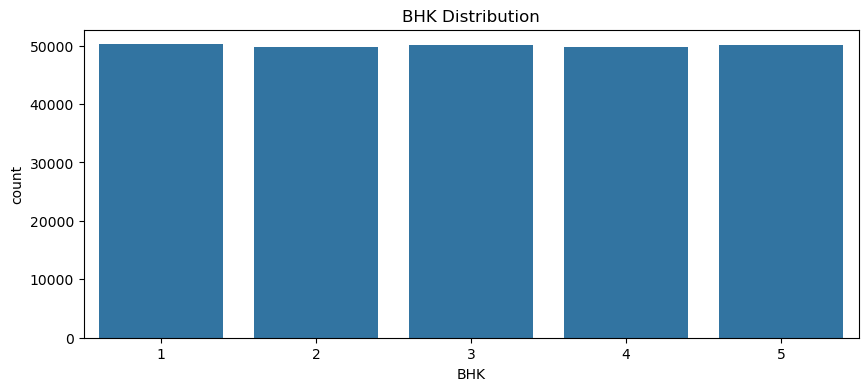

In [61]:
# BHK distribution
plt.figure(figsize=(10,4))
sns.countplot(x='BHK', data=df)
plt.title("BHK Distribution")
plt.savefig("../outputs/figures/bhk_distribution.png", bbox_inches='tight')
plt.show()

## 3.Correlation Matrix & Heatmap 

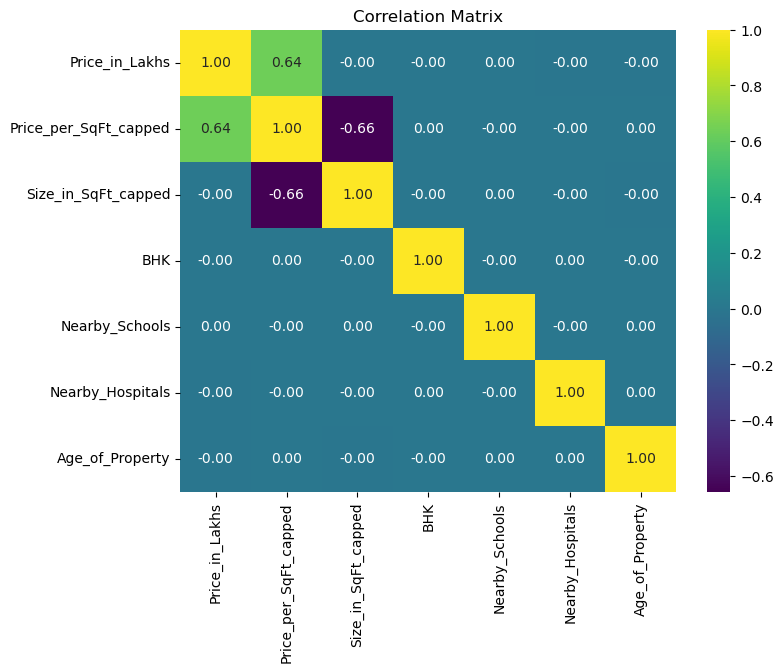

In [62]:
num_cols = ['Price_in_Lakhs','Price_per_SqFt_capped','Size_in_SqFt_capped','BHK','Nearby_Schools','Nearby_Hospitals','Age_of_Property']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")
plt.savefig("../outputs/figures/correlation_heatmap.png", bbox_inches='tight')
plt.show()


# 4.  Properties by Owner Type

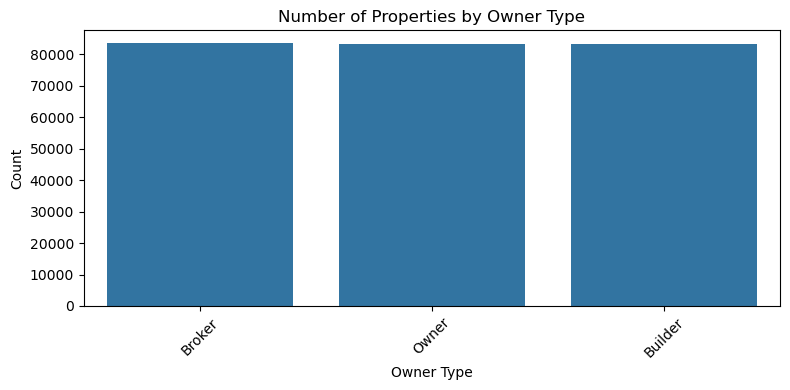

Owner_Type
Broker     83479
Owner      83268
Builder    83253
Name: count, dtype: int64

In [63]:
owner_counts = df['Owner_Type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=owner_counts.index, y=owner_counts.values)
plt.title("Number of Properties by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/figures/owner_type_counts.png")
plt.show()

owner_counts


# 5.Impact of Parking Space in Property Price

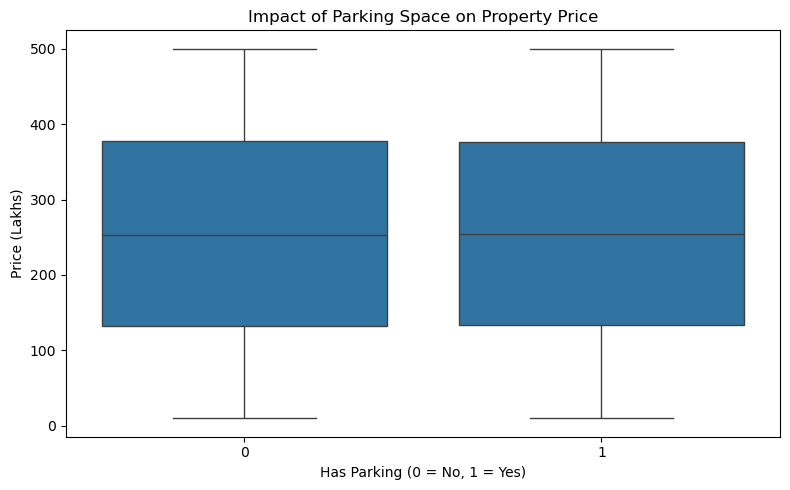

has_parking
0    254.429369
1    254.745492
Name: Price_in_Lakhs, dtype: float64

In [64]:
# Q18: Does parking space affect property price?
plt.figure(figsize=(8,5))
sns.boxplot(x='has_parking', y='Price_in_Lakhs', data=df)
plt.title("Impact of Parking Space on Property Price")
plt.xlabel("Has Parking (0 = No, 1 = Yes)")
plt.ylabel("Price (Lakhs)")
plt.tight_layout()
plt.savefig("../outputs/figures/parking_vs_price.png")
plt.show()

df.groupby('has_parking')['Price_in_Lakhs'].mean()


# 6.Impact of amenities in price per sq ft

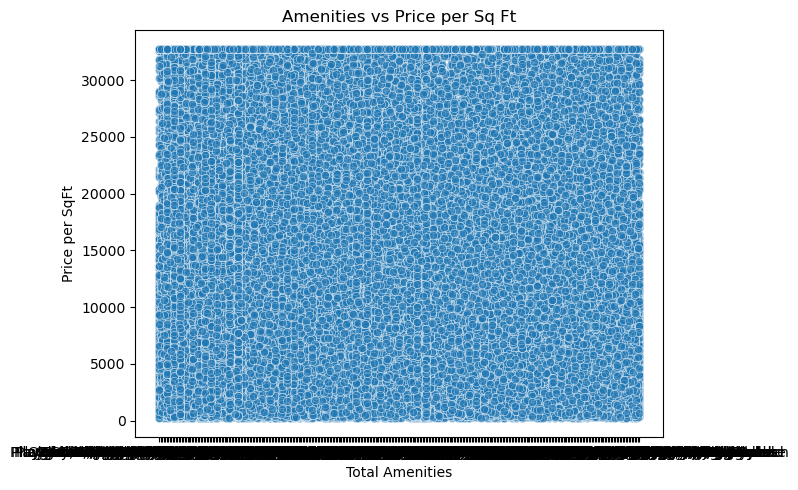

Amenities
Clubhouse                                   13032.554509
Clubhouse, Garden                           12851.928811
Clubhouse, Garden, Gym                      13261.041944
Clubhouse, Garden, Gym, Playground          12501.973059
Clubhouse, Garden, Gym, Playground, Pool    13092.472805
Name: Price_per_SqFt, dtype: float64

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Amenities', y='Price_per_SqFt_capped', data=df, alpha=0.6)
plt.title("Amenities vs Price per Sq Ft")
plt.xlabel("Total Amenities")
plt.ylabel("Price per SqFt")
plt.tight_layout()
plt.savefig("../outputs/figures/amenities_vs_ppsqft.png")
plt.show()

df.groupby('Amenities')['Price_per_SqFt'].mean().head()


# 7. Public Transport Accessibility vs Price per Sq Ft

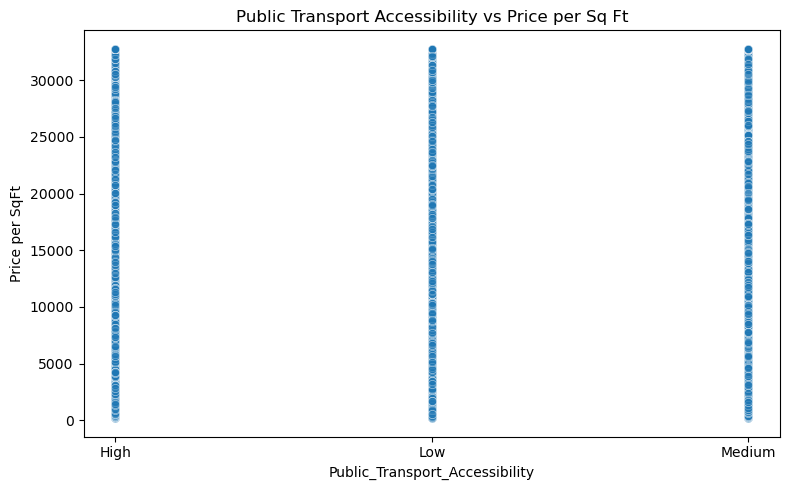

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Public_Transport_Accessibility', y='Price_per_SqFt_capped', data=df, alpha=0.6)
plt.title("Public Transport Accessibility vs Price per Sq Ft")
plt.xlabel("Public_Transport_Accessibility")
plt.ylabel("Price per SqFt")
plt.tight_layout()
plt.savefig("../outputs/figures/public_transport_vs_ppsqft.png")
plt.show()
